In [ ]:
# https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html
# https://tkipf.github.io/graph-convolutional-networks/

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long) # must be ints 
x = torch.tensor([[-1], [0], [1]], dtype=torch.float) # 1 Feature per node

data = Data(
    x=x,                  # Node feature matrix
    edge_index=edge_index # Edges
)
Data(
    edge_index=[2, 4], 
     x=[3, 1])

Data(x=[2], edge_index=[2])

In [ ]:
from graphviz import Digraph
dot = Digraph()

for i in range(x.shape[0]):
    dot.node(str(i), 'Node '+str(i)+'\nx1 = '+str(round(float(x[i]), 2)))

for i in range(edge_index.shape[1]):
    dot.edge(str(int(edge_index[:, i][0])),
             str(int(edge_index[:, i][1])))
dot    

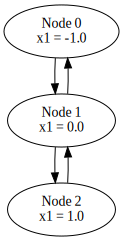

In [ ]:
# Alternate version passing a list of index tuples
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous()) # <---- Note that the edge index is transposed and the contiguous method is called.
Data(edge_index=[2, 4], x=[3, 1])
dot = Digraph()

for i in range(x.shape[0]):
    dot.node(str(i), 'Node '+str(i)+'\nx1 = '+str(round(float(x[i]), 2)))

for i in range(edge_index.shape[0]):
    dot.edge(str(int(edge_index[i, 0])),
             str(int(edge_index[i, 1])))
dot    

In [ ]:
data.validate(raise_on_error=True)

True

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
# 600 graphs, 6 classes

Extracting /tmp/ENZYMES/ENZYMES/ENZYMES.zip
Processing...
Done!


In [ ]:
len(dataset)

600

In [ ]:
data = dataset[0]
data # this shows the shape of each

Data(edge_index=[2, 168], x=[37, 3], y=[1])

In [ ]:
# citation graph?
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

In [ ]:
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')
# >>> Accuracy: 0.8150

Accuracy: 0.8060


In [ ]:
x = data.x
edge_index = data.edge_index
dot = Digraph()

for i in range(x.shape[0]):
    dot.node(str(i), '')

for i in range(edge_index.shape[1]):
    dot.edge(str(int(edge_index[:, i][0])),
             str(int(edge_index[:, i][1])))

dot    

KeyboardInterrupt: 

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])